In [1]:
import numpy as np
import coveropt as co
from BoundsWithSideInfo import BoundsWithSideInfo
import time as time
import matplotlib.pyplot as plt
#%matplotlib tk

fig_fontsize = 10
fig_fontsize_legend = 8.5
fig_dpi = 150
fig_width = 3.4
fig_height = 1.5

params = {
   'axes.labelsize': fig_fontsize_legend,
   'font.family': 'serif',
   'font.size': fig_fontsize,
   'legend.fontsize': fig_fontsize_legend,
   'xtick.labelsize': fig_fontsize_legend,
   'ytick.labelsize': fig_fontsize_legend,
   'mathtext.fontset': 'cm',
   }
plt.rcParams.update(params)

In [2]:
x_max = 5 * np.pi
x_min = - x_max
n_data_pts = 3          # No. of data points
n_test_pts = 1000       # No. of test points

def first_order_oracle(arg_test_vec):
    # f(x) = sin(x/2)
    y_test = np.sin(arg_test_vec / 2)
    # \nabla f(x) = cos(x/2)/2
    grad_test = np.cos(arg_test_vec / 2) / 2
    return y_test[:, 0], grad_test

# For regression data points
x_data = np.array([[-2.5,0, 2.5]]).T * np.pi
y_data, grad_data = first_order_oracle(x_data)
# For plotting
x_test = np.array([np.linspace(x_min, x_max, n_test_pts)]).T
y_test, _ = first_order_oracle(x_test)

In [3]:
grad_L_bound_loose = 0.5
sin_x_by_2_bound_loose_obj = BoundsWithSideInfo(x_data, y_data, grad_data, grad_L_bound_loose,
                                     first_order_oracle)
start = time.time()
sin_x_by_2_bounds_vec_loose_lb, sin_x_by_2_bounds_vec_loose_ub = sin_x_by_2_bound_loose_obj.get_bounds(x_test)
end = time.time()
total_time_taken_loose = end - start
print('Avg time taken for bound construction: {:1.2f} milliseconds\n'.format(
      total_time_taken_loose/n_test_pts * 1e3))

Lower bound computation: 100%|██████████| 1000/1000 [00:06<00:00, 158.74it/s]


Avg time taken for bound construction: 12.88 milliseconds



In [4]:
grad_L_bound_true = 0.25
sin_x_by_2_bound_true_obj = BoundsWithSideInfo(x_data, y_data, grad_data, grad_L_bound_true,
                                    first_order_oracle)
start = time.time()
sin_x_by_2_bounds_vec_true_lb, sin_x_by_2_bounds_vec_true_ub = sin_x_by_2_bound_true_obj.get_bounds(x_test)
end = time.time()
total_time_taken_true = end - start
print('Avg time taken for bound construction: {:1.2f} milliseconds\n'.format(
      total_time_taken_true/n_test_pts * 1e3))

Lower bound computation: 100%|██████████| 1000/1000 [00:06<00:00, 146.13it/s]

Avg time taken for bound construction: 14.17 milliseconds



In [5]:
def fun_lb(x):
    return -np.ones((x.shape[0],))

def fun_ub(x):
    y, _ = first_order_oracle(x)
    return y + 1

sin_x_by_2_bound_true_bounded_obj = BoundsWithSideInfo(x_data, y_data, grad_data, grad_L_bound_true,
                                            first_order_oracle, fun_lb=fun_lb, fun_ub=fun_ub)
start = time.time()
sin_x_by_2_bounds_vec_true_bounded_lb, sin_x_by_2_bounds_vec_true_bounded_ub = \
    sin_x_by_2_bound_true_bounded_obj.get_bounds(x_test)
end = time.time()
total_time_taken_true_bounded = end - start
print('Avg time taken for bound construction: {:1.2f} milliseconds\n'.format(
      total_time_taken_true_bounded/n_test_pts * 1e3))

Lower bound computation: 100%|██████████| 1000/1000 [00:06<00:00, 144.08it/s]

Avg time taken for bound construction: 14.11 milliseconds



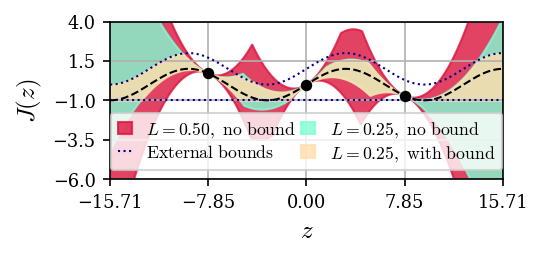

In [6]:
xlim_tup = (x_min, x_max)
ylim_tup = (-6, 4)

fig = plt.figure(figsize=(fig_width, fig_height), dpi=fig_dpi)
plt.plot(x_test, y_test, 'k--', lw=1)
plt.plot(x_test, fun_lb(x_test), color='darkblue', linestyle=':', lw=1, label=r'$\mathrm{External\ bounds}$')
plt.plot(x_test, fun_ub(x_test),color='darkblue', linestyle=':', lw=1)
plt.scatter(x_data,y_data,c='black', s=20, zorder= 1000)
plt.fill_between(x_test[:,0], sin_x_by_2_bounds_vec_loose_lb, sin_x_by_2_bounds_vec_loose_ub, color='crimson', 
                 alpha = 0.8, label=r'$L={:1.2f},\ \mathrm{{no\ bound}}$'.format(grad_L_bound_loose))
plt.fill_between(x_test[:,0], sin_x_by_2_bounds_vec_true_lb, sin_x_by_2_bounds_vec_true_ub, color='aquamarine', 
                 alpha = 0.8, label=r'$L={:1.2f},\ \mathrm{{no\ bound}}$'.format(grad_L_bound_true))
plt.fill_between(x_test[:,0], sin_x_by_2_bounds_vec_true_bounded_lb, sin_x_by_2_bounds_vec_true_bounded_ub, 
                 color='navajowhite', alpha = 0.8, 
                 label=r'$L={:1.2f},\ \mathrm{{with\ bound}}$'.format(grad_L_bound_true))
plt.xlabel('$z$', fontsize = 1.2 * fig_fontsize)
plt.ylabel('$J(z)$', fontsize = 1.2 * fig_fontsize)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0,2,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], 
        loc='lower center', ncol=2, columnspacing = 0.3, labelspacing = 0.2, handlelength=0.8)
plt.xlim(xlim_tup)
plt.ylim(ylim_tup)
xtick_pts = np.hstack((np.array([x_min, x_max]), x_data[:, 0]))
plt.xticks(xtick_pts) #, rotation = 10)
ytick_pts = np.linspace(ylim_tup[0], ylim_tup[1], 5)
plt.yticks(ytick_pts)
plt.grid()
# plt.title('Lipschitz cts gradient-based bounds')
plt.subplots_adjust(top=0.97, bottom=0.27, left=0.18, right=0.95, hspace=0.0, wspace=0.0)
plt.savefig('figs/sin_xby2_bounds.png', transparent=True, dpi=300)
plt.savefig('figs/sin_xby2_bounds.svg', transparent=True, dpi=300)

In [7]:
import scipy.stats as st

x_max = 7
x_min = - x_max
n_data_pts = 2
n_test_pts = 1000

def first_order_oracle(x):
    return -np.log(st.norm.cdf(x[:, 0])), -1/st.norm.cdf(x)*st.norm.pdf(x)

# Data definition
x_data = np.array([[-3, 3]]).T
y_data, grad_data = first_order_oracle(x_data)

x_test = np.array([np.linspace(x_min, x_max, n_test_pts)]).T
y_test, _ = first_order_oracle(x_test)

In [8]:
grad_L_bound = 3

log_norm_cdf_bound_obj = BoundsWithSideInfo(x_data, y_data, grad_data, grad_L_bound, first_order_oracle)
start = time.time()
bounds_vec_lb, bounds_vec_ub = log_norm_cdf_bound_obj.get_bounds(x_test)
end = time.time()
total_time_taken = end - start
print('Avg time taken for bound construction: {:1.2f} milliseconds\n'.format(
      total_time_taken/n_test_pts * 1e3))

Lower bound computation: 100%|██████████| 1000/1000 [00:07<00:00, 138.21it/s]

Avg time taken for bound construction: 14.89 milliseconds



In [9]:
log_norm_cdf_bound_cvx_obj = BoundsWithSideInfo(x_data, y_data, grad_data, grad_L_bound, first_order_oracle, 
                                                is_convex=True)
start = time.time()
bounds_vec_cvx_lb, bounds_vec_cvx_ub = log_norm_cdf_bound_cvx_obj.get_bounds(x_test)
end = time.time()
total_time_taken_cvx = end - start
print('Avg time taken for bound construction: {:1.2f} milliseconds\n'.format(
      total_time_taken_cvx/n_test_pts * 1e3))

Lower bound computation: 100%|██████████| 1000/1000 [00:07<00:00, 139.03it/s]

Avg time taken for bound construction: 13.68 milliseconds



In [10]:
log_norm_cdf_bound_cvx_mono_obj = BoundsWithSideInfo(x_data, y_data, grad_data, grad_L_bound, first_order_oracle, 
                                                     is_convex=True, is_monotone_dec=True)
start = time.time()
bounds_vec_cvx_mono_lb, bounds_vec_cvx_mono_ub = log_norm_cdf_bound_cvx_mono_obj.get_bounds(x_test)
end = time.time()
total_time_taken_cvx_mono = end - start
print('Avg time taken for bound construction: {:1.2f} milliseconds\n'.format(
      total_time_taken_cvx_mono/n_test_pts * 1e3))

Lower bound computation: 100%|██████████| 1000/1000 [00:08<00:00, 124.39it/s]

Avg time taken for bound construction: 15.58 milliseconds



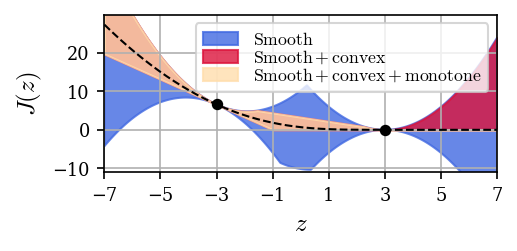

In [11]:
xlim_tup = (x_min, x_max)
ylim_tup = (-11, 30)

fig = plt.figure(figsize=(fig_width, fig_height), dpi=fig_dpi)
plt.plot(x_test, y_test, 'k--', lw=1)
plt.scatter(x_data,y_data,c='black', s=20, zorder= 1000)
plt.fill_between(x_test[:,0], bounds_vec_lb, bounds_vec_ub, color='royalblue', alpha = 0.8,
                 label=r'$\mathrm{Smooth}$')
plt.fill_between(x_test[:,0], bounds_vec_cvx_lb, bounds_vec_cvx_ub, color='crimson', alpha = 0.8,
                 label=r'$\mathrm{Smooth+convex}$')
plt.fill_between(x_test[:,0], bounds_vec_cvx_mono_lb, bounds_vec_cvx_mono_ub, color='navajowhite', alpha = 0.8,
                 label=r'$\mathrm{Smooth+convex+monotone}$')
plt.xlabel('$z$', fontsize = 1.2 * fig_fontsize)
plt.ylabel('$J(z)$', fontsize = 1.2 * fig_fontsize)

plt.legend(loc='best', ncol=1, labelspacing = 0)
plt.xlim(xlim_tup)
plt.xticks(list(np.arange(x_min, x_max+1, 2)))
plt.ylim(ylim_tup)
plt.yticks(np.arange(-10,21,10))
plt.grid()
# plt.title('Lipschitz cts gradient-based bounds')
plt.subplots_adjust(top=0.97, bottom=0.27, left=0.18, right=0.95, hspace=0.0, wspace=0.0)
plt.savefig('figs/normcdf_bounds.png', transparent=True, dpi=300)
plt.savefig('figs/normcdf_bounds.svg', transparent=True, dpi=300)